In [3]:
pip install numpy pandas matplotlib seaborn scikit-learn xgboost

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
Dataset shape: (20640, 9)

Missing values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

Dataset description:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.63

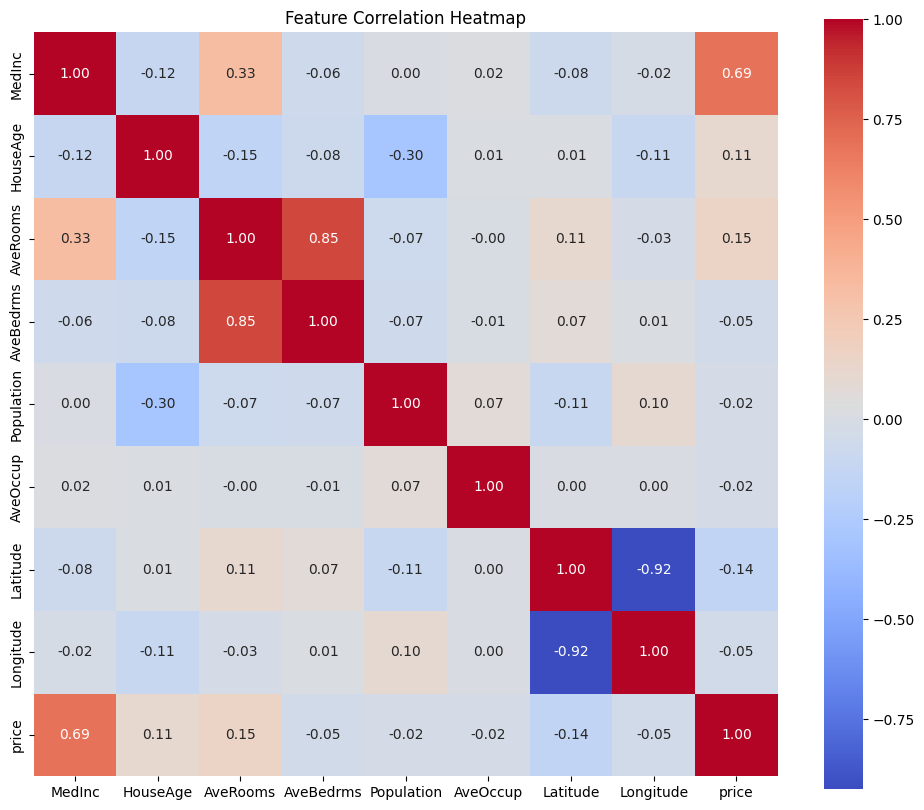


Train shape: (16512, 8)
Test shape: (4128, 8)

Training R2 Score: 0.9445725845802867
Training MAE: 0.19257627556572793


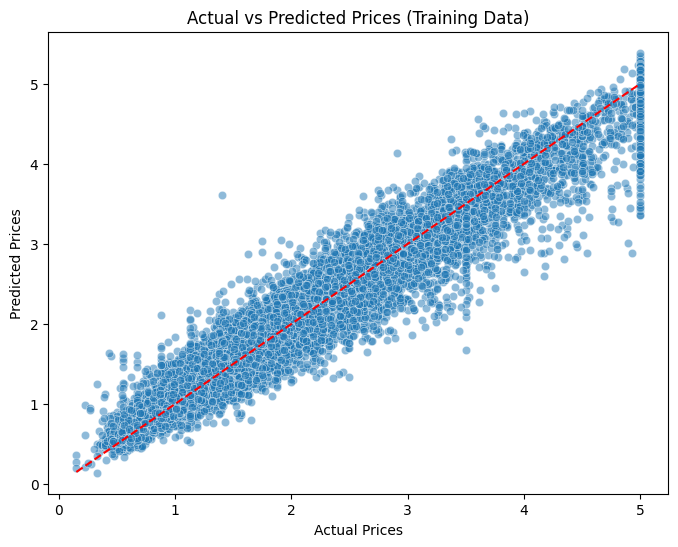


Test R2 Score: 0.8301370561019205
Test MAE: 0.30957335413783094
Test RMSE: 0.4717943691423984


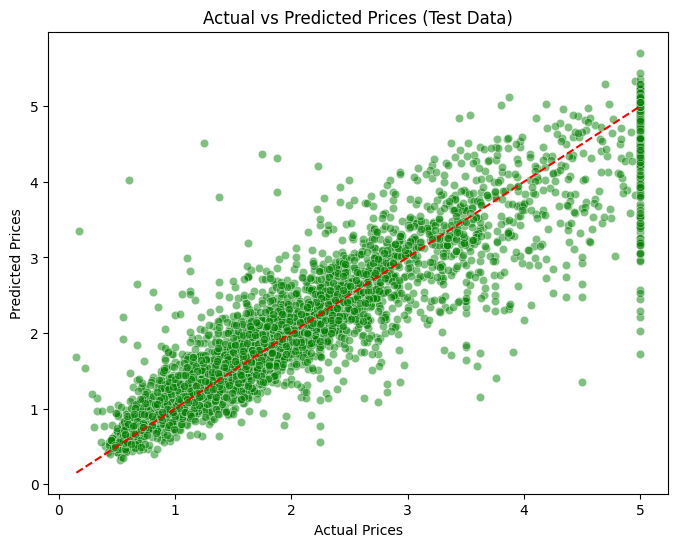

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

# Load the California Housing dataset
housing = fetch_california_housing()
house_price_dataframe = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add target (price) to the dataframe
house_price_dataframe['price'] = housing.target

# Display first 5 rows
print(house_price_dataframe.head())

# Shape of the dataset
print("Dataset shape:", house_price_dataframe.shape)

# Check for missing values
print("\nMissing values:\n", house_price_dataframe.isnull().sum())

# Statistical summary
print("\nDataset description:\n", house_price_dataframe.describe())

# Correlation matrix
correlation = house_price_dataframe.corr()

# Heatmap for correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Splitting data into features and target
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

# Splitting into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Initialize and train XGBoost model
model = XGBRegressor(random_state=42)
model.fit(X_train, Y_train)

# Predict on training data
train_predictions = model.predict(X_train)

# Training performance
r2_train = r2_score(Y_train, train_predictions)
mae_train = mean_absolute_error(Y_train, train_predictions)

print("\nTraining R2 Score:", r2_train)
print("Training MAE:", mae_train)

# Scatter plot for training data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_train, y=train_predictions, alpha=0.5)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Training Data)")
plt.show()

# Predict on test data
test_predictions = model.predict(X_test)

# Test performance
r2_test = r2_score(Y_test, test_predictions)
mae_test = mean_absolute_error(Y_test, test_predictions)
rmse_test = np.sqrt(mean_squared_error(Y_test, test_predictions))

print("\nTest R2 Score:", r2_test)
print("Test MAE:", mae_test)
print("Test RMSE:", rmse_test)

# Scatter plot for test data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=test_predictions, alpha=0.5, color='green')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Test Data)")
plt.show()